In [53]:
import pandas as pd
import numpy as np

In [54]:
# GMM高斯算法实例
import pandas as pd
file_path = "./fremont.csv"
data = pd.read_csv(file_path, index_col='Date', parse_dates=True)
data.head()

,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
Date,,,
2012-10-03 00:00:00,13.0,4.0,9.0
2012-10-03 01:00:00,10.0,4.0,6.0
2012-10-03 02:00:00,2.0,1.0,1.0
2012-10-03 03:00:00,5.0,2.0,3.0
2012-10-03 04:00:00,7.0,6.0,1.0


In [55]:
data = data.drop(['Fremont Bridge Total'], axis=1)

In [56]:
data.head()

,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
Date,,
2012-10-03 00:00:00,4.0,9.0
2012-10-03 01:00:00,4.0,6.0
2012-10-03 02:00:00,1.0,1.0
2012-10-03 03:00:00,2.0,3.0
2012-10-03 04:00:00,6.0,1.0


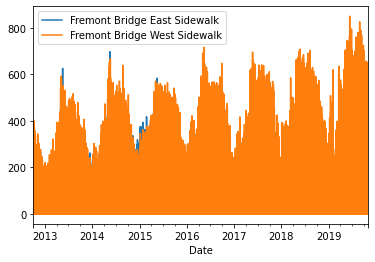

In [57]:
# 可视化数据
%matplotlib inline
data.plot()

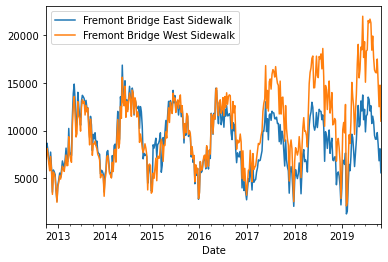

In [58]:
# 数据重采样，按周('W')或者（‘7D’）进行计算
%matplotlib inline

# 这个函数的用法是对于时间索引，可以按周进行数据的求和统计
data.resample('W').sum().plot()

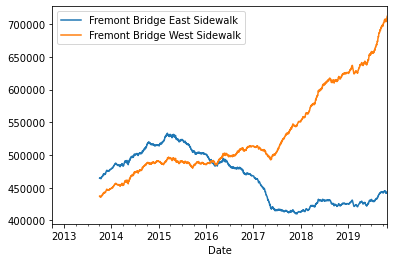

In [59]:
# rolling()函数  滑动窗口
data.resample('D').sum().rolling(365).sum().plot()

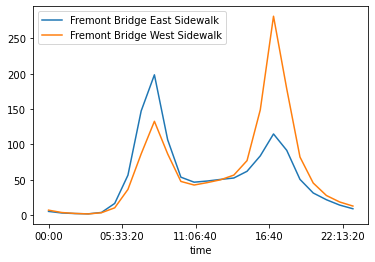

In [60]:
import matplotlib.pyplot as plt
# 按时间分组，这里是统计一天当中的情况
data.groupby(data.index.time).mean().plot()

In [61]:
data.columns = ['West', 'East']

In [62]:
data.head()

,West,East
Date,,
2012-10-03 00:00:00,4.0,9.0
2012-10-03 01:00:00,4.0,6.0
2012-10-03 02:00:00,1.0,1.0
2012-10-03 03:00:00,2.0,3.0
2012-10-03 04:00:00,6.0,1.0


In [63]:
data['Total'] = data['West'] + data['East']

In [67]:
data.head()

,West,East,Total
Date,,,
2012-10-03 00:00:00,4.0,9.0,13.0
2012-10-03 01:00:00,4.0,6.0,10.0
2012-10-03 02:00:00,1.0,1.0,2.0
2012-10-03 03:00:00,2.0,3.0,5.0
2012-10-03 04:00:00,6.0,1.0,7.0


In [70]:
pivoted = data.pivot_table('Total', index=data.index.time,columns=data.index.date)
pivoted.head()

,2012-10-03,2012-10-04,2012-10-05,2012-10-06,2012-10-07,2012-10-08,2012-10-09,2012-10-10,2012-10-11,2012-10-12,2012-10-13,2012-10-14,2012-10-15,2012-10-16,2012-10-17,2012-10-18,2012-10-19,2012-10-20,2012-10-21,2012-10-22,2012-10-23,2012-10-24,2012-10-25,2012-10-26,2012-10-27,2012-10-28,2012-10-29,2012-10-30,2012-10-31,2012-11-01,2012-11-02,2012-11-03,2012-11-04,2012-11-05,2012-11-06,2012-11-07,2012-11-08,2012-11-09,2012-11-10,2012-11-11,...,2019-09-22,2019-09-23,2019-09-24,2019-09-25,2019-09-26,2019-09-27,2019-09-28,2019-09-29,2019-09-30,2019-10-01,2019-10-02,2019-10-03,2019-10-04,2019-10-05,2019-10-06,2019-10-07,2019-10-08,2019-10-09,2019-10-10,2019-10-11,2019-10-12,2019-10-13,2019-10-14,2019-10-15,2019-10-16,2019-10-17,2019-10-18,2019-10-19,2019-10-20,2019-10-21,2019-10-22,2019-10-23,2019-10-24,2019-10-25,2019-10-26,2019-10-27,2019-10-28,2019-10-29,2019-10-30,2019-10-31
00:00:00,13.0,18.0,11.0,15.0,11.0,9.0,12.0,15.0,21.0,17.0,18.0,6.0,7.0,10.0,22.0,7.0,12.0,9.0,17.0,6.0,6.0,11.0,3.0,19.0,12.0,10.0,11.0,15.0,4.0,7.0,6.0,12.0,18.0,7.0,10.0,12.0,2.0,19.0,20.0,10.0,...,21.0,3.0,8.0,5.0,13.0,12.0,14.0,19.0,3.0,10.0,8.0,7.0,10.0,29.0,14.0,4.0,4.0,6.0,5.0,18.0,21.0,22.0,9.0,10.0,4.0,6.0,8.0,10.0,17.0,5.0,4.0,9.0,6.0,14.0,16.0,11.0,5.0,3.0,5.0,5.0
01:00:00,10.0,3.0,8.0,15.0,17.0,4.0,3.0,3.0,10.0,13.0,11.0,9.0,3.0,5.0,6.0,7.0,4.0,8.0,11.0,4.0,2.0,11.0,6.0,16.0,9.0,11.0,1.0,1.0,5.0,5.0,7.0,6.0,10.0,3.0,7.0,5.0,6.0,5.0,8.0,7.0,...,16.0,2.0,3.0,8.0,6.0,4.0,10.0,10.0,0.0,0.0,2.0,5.0,5.0,14.0,14.0,4.0,5.0,6.0,4.0,1.0,9.0,7.0,4.0,7.0,6.0,3.0,5.0,7.0,10.0,0.0,5.0,3.0,2.0,4.0,4.0,11.0,0.0,7.0,4.0,3.0
02:00:00,2.0,9.0,7.0,9.0,3.0,5.0,4.0,3.0,13.0,5.0,16.0,8.0,5.0,3.0,5.0,9.0,5.0,12.0,11.0,2.0,3.0,9.0,3.0,4.0,16.0,7.0,3.0,5.0,2.0,2.0,2.0,5.0,10.0,2.0,5.0,6.0,4.0,5.0,10.0,8.0,...,8.0,0.0,3.0,5.0,5.0,4.0,4.0,8.0,1.0,1.0,4.0,4.0,7.0,11.0,9.0,1.0,2.0,2.0,1.0,0.0,5.0,2.0,3.0,5.0,2.0,1.0,5.0,3.0,10.0,0.0,2.0,3.0,1.0,0.0,5.0,12.0,0.0,0.0,1.0,2.0
03:00:00,5.0,3.0,4.0,3.0,6.0,5.0,8.0,4.0,2.0,7.0,4.0,4.0,3.0,5.0,4.0,5.0,2.0,5.0,4.0,4.0,1.0,4.0,3.0,1.0,2.0,4.0,2.0,3.0,1.0,0.0,4.0,2.0,3.0,3.0,3.0,6.0,6.0,2.0,5.0,4.0,...,3.0,2.0,4.0,5.0,4.0,2.0,3.0,8.0,5.0,3.0,3.0,2.0,2.0,5.0,3.0,3.0,2.0,3.0,2.0,10.0,5.0,3.0,1.0,3.0,6.0,4.0,3.0,1.0,0.0,3.0,5.0,5.0,2.0,2.0,1.0,5.0,5.0,3.0,1.0,5.0
04:00:00,7.0,8.0,9.0,5.0,3.0,5.0,9.0,5.0,12.0,5.0,3.0,5.0,6.0,5.0,7.0,8.0,9.0,3.0,4.0,10.0,11.0,5.0,5.0,10.0,5.0,3.0,5.0,6.0,11.0,6.0,10.0,4.0,3.0,5.0,8.0,10.0,10.0,7.0,4.0,3.0,...,3.0,6.0,11.0,10.0,9.0,4.0,2.0,3.0,7.0,7.0,7.0,4.0,3.0,2.0,3.0,9.0,6.0,9.0,6.0,3.0,1.0,10.0,4.0,7.0,3.0,9.0,7.0,1.0,3.0,7.0,6.0,14.0,11.0,10.0,8.0,0.0,6.0,12.0,7.0,13.0


In [69]:
pivoted.iloc[:5,:5]

,2012-10-03,2012-10-04,2012-10-05,2012-10-06,2012-10-07
00:00:00,13.0,18.0,11.0,15.0,11.0
01:00:00,10.0,3.0,8.0,15.0,17.0
02:00:00,2.0,9.0,7.0,9.0,3.0
03:00:00,5.0,3.0,4.0,3.0,6.0
04:00:00,7.0,8.0,9.0,5.0,3.0


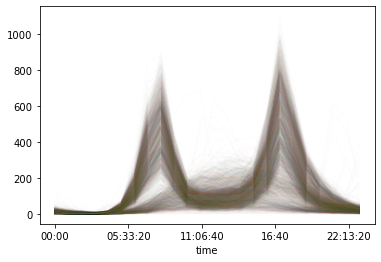

In [72]:
pivoted.plot(legend=False, alpha = 0.01)

In [74]:
pivoted.shape

(24, 2585)

In [76]:
pivoted.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24 entries, 00:00:00 to 23:00:00
Columns: 2585 entries, 2012-10-03 to 2019-10-31
dtypes: float64(2585)
memory usage: 484.9+ KB


In [84]:
# 转置成矩阵
X = pivoted.fillna(0).T.values
X.shape

(2585, 24)

In [85]:
X

array([[13., 10.,  2., ..., 63., 49., 17.],
       [18.,  3.,  9., ..., 70., 46., 41.],
       [11.,  8.,  7., ..., 42., 36., 32.],
       ...,
       [ 3.,  7.,  0., ..., 57., 27., 12.],
       [ 5.,  4.,  1., ..., 59., 27., 17.],
       [ 5.,  3.,  2., ..., 41., 32., 18.]])

In [86]:
# 特征工程
from sklearn.decomposition import PCA
# 把数据进行降维，降维到2维数据
X2 = PCA(2).fit_transform(X)
X2.shape

(2585, 2)

In [87]:
X2

array([[290.26191122, -19.44396997],
       [212.57342307,  23.90646002],
       [112.17399602,  31.84959274],
       ...,
       [555.41463834,  46.85582328],
       [512.7075962 ,  -5.67691102],
       [377.74937957,  46.30646054]])

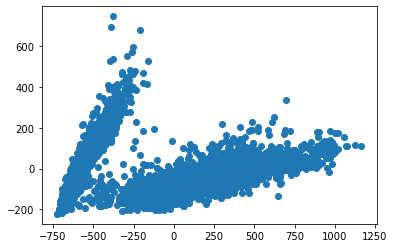

In [88]:
plt.scatter(X2[:,0],X2[:,1])

In [89]:
# 引入算法
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(2)
gmm.fit(X)

# 返回预测属于某标签的概率
labels = gmm.predict_proba(X)
labels

array([[1.00000000e+000, 4.81442473e-171],
       [1.00000000e+000, 2.46649216e-138],
       [1.00000000e+000, 3.43398259e-114],
       ...,
       [1.00000000e+000, 7.96651641e-249],
       [1.00000000e+000, 8.70124304e-268],
       [1.00000000e+000, 2.30496404e-217]])

In [90]:
# 返回预测标签
labels = gmm.predict(X)
labels

array([0, 0, 0, ..., 0, 0, 0])

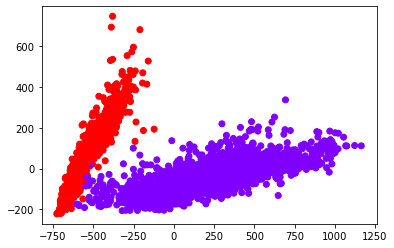

In [91]:
plt.scatter(X2[:,0],X2[:,1], c=labels, cmap='rainbow')

Text(0.5, 1.0, 'Red Cluster')

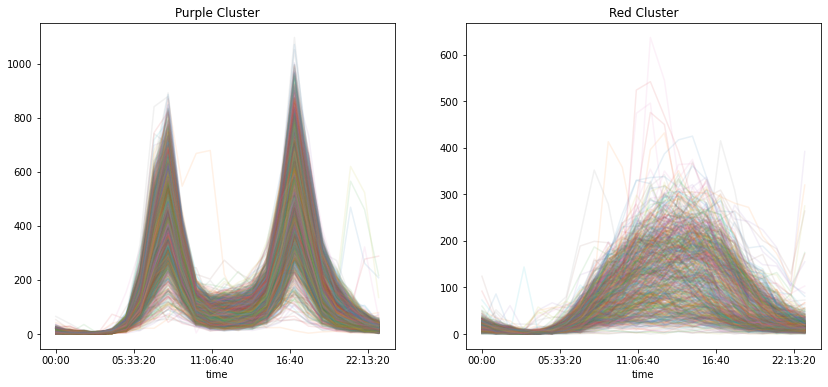

In [92]:
fig, ax = plt.subplots(1, 2, figsize = (14,6))

pivoted.T[labels ==0].T.plot(legend =False, alpha = 0.1, ax=ax[0])
pivoted.T[labels ==1].T.plot(legend =False, alpha = 0.1, ax=ax[1])

ax[0].set_title('Purple Cluster')
ax[1].set_title('Red Cluster')

<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
/Users/anlei/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


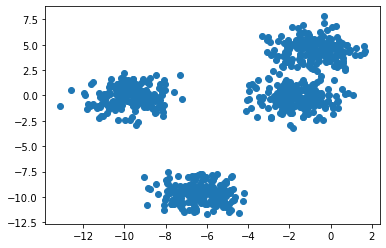

In [94]:
# 
from sklearn.datasets.samples_generator import make_blobs
X, y_true = make_blobs(n_samples=800, centers=4, random_state=11)
plt.scatter(X[:, 0],X[:, 1])

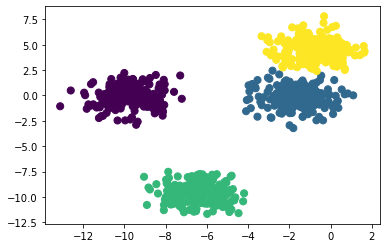

In [95]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)


plt.scatter(X[:,0], X[:,1], c = y_kmeans, s=50,cmap="viridis")
centers = kmeans.cluster_centers_

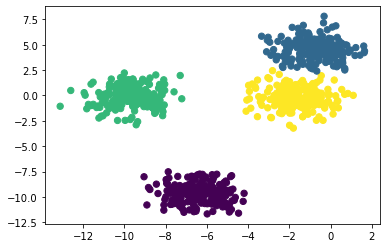

In [99]:
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=4).fit(X)
labels =gmm.predict(X)
plt.scatter(X[:,0], X[:,1],c = labels, s=40, cmap='viridis')

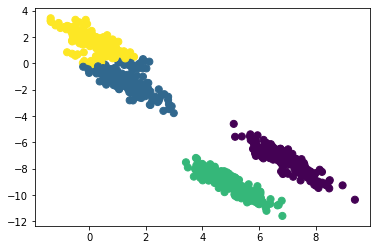

In [100]:
rng = np.random.RandomState(13)
X_stretched = np.dot(X, rng.randn(2,2))

kmeans = KMeans(n_clusters=4,random_state=1)
kmeans.fit(X_stretched)

y_kmeans = kmeans.predict(X_stretched)
plt.scatter(X_stretched[:,0],X_stretched[:,1],c=y_kmeans,s=50,cmap='viridis')
centers = kmeans.cluster_centers_